<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Напиши здесь свои мысли и идеи по поводу комментария ревьюера.

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Содержание:

<br>1) Изучение данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних городах за несколько лет</br>
<br>2) Предобработка данных. Преобразование данных, удаление аномальных данных, приведение данных к локаничному виду</br>
<br>3) Добавление новых столбцов в таблицу с данными</br>
<br>4) Исследовательский анализ. Проведен анализ по возможным срезам, построены графики и диаграмы</br>
<br>5) Общий вывод</br>
<br>6) Чек-лист</br>


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(R"C:\Users\lebed\Downloads\real_estate_data (1).csv", sep='\t')
pd.set_option('display.max_columns', 50)

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

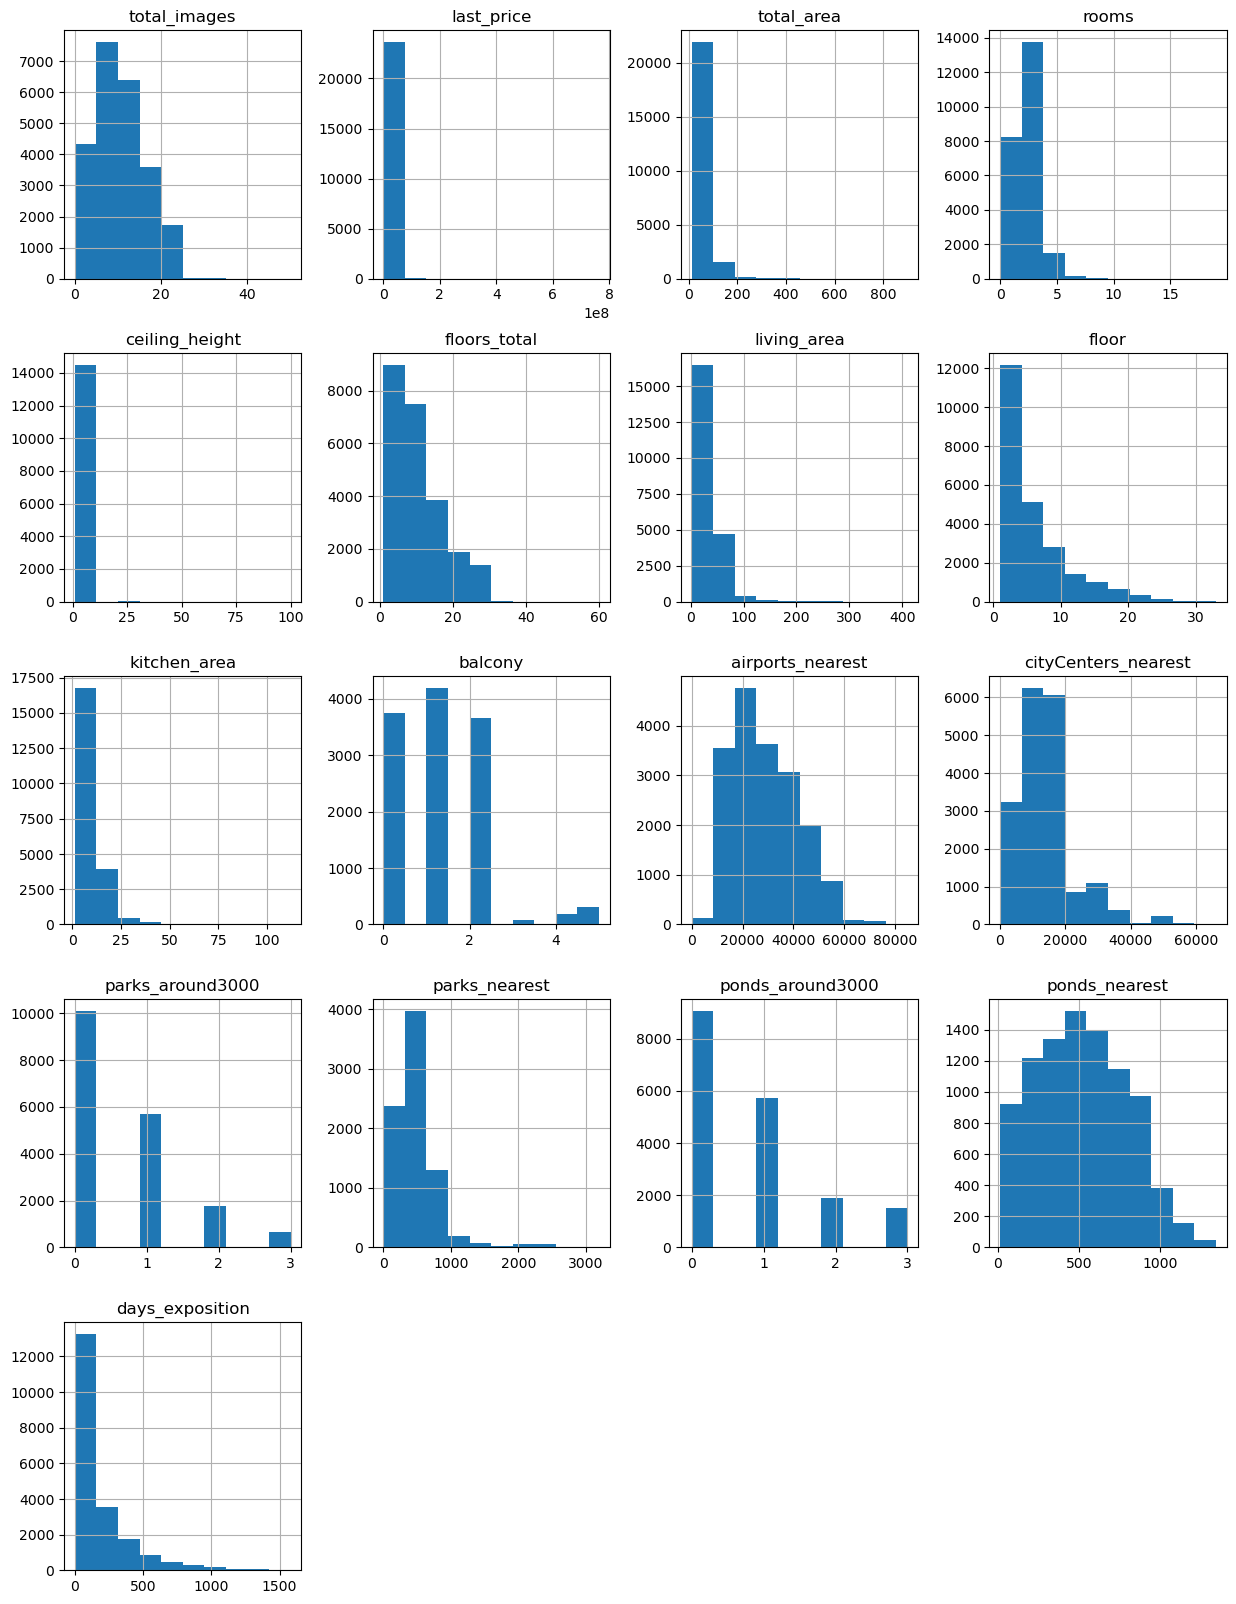

In [6]:
data.hist(figsize=(15, 20))
None

<br> В представленной информации следует внести изменения  в название столбцов, разобраться в некоторых столбцах и внести изменения в формат(first_day_exposition) или сделать исправлени,также много пропусков  данных</br>

### Предобработка данных

Приведем название столбцов в змеиный формат

In [7]:
data = data.rename(columns={ 'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000','ponds_around3000': 'ponds_around_3000'})

In [8]:
data.duplicated().sum()

0

Приведем в столбце locality_name все к нижнему регистру и избавимся от Ё, изменим гордской поселок на поселок городского типа

In [9]:
display(data['locality_name'].unique())
display(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

365

In [10]:
display(data['locality_name'].sort_values(ascending=False).unique())
display(len(data['locality_name'].unique()))


array(['шлиссельбург', 'тосно', 'тихвин', 'сясьстрой', 'сосновый бор',
       'сланцы', 'сестрорецк', 'сертолово', 'село шум',
       'село старая ладога', 'село русско-высоцкое', 'село рождествено',
       'село путилово', 'село паша', 'село павлово', 'село никольское',
       'село копорье', 'светогорск', 'санкт-петербург',
       'садовое товарищество садко', 'садовое товарищество рахья',
       'садовое товарищество приладожский',
       'садовое товарищество новая ропша',
       'садоводческое некоммерческое товарищество лесная поляна',
       'пушкин', 'приозерск', 'приморск', 'поселок щеглово',
       'поселок шушары', 'поселок шугозеро', 'поселок цвылево',
       'поселок цвелодубово', 'поселок форт красная горка',
       'поселок ушаки', 'поселок усть-луга', 'поселок усть-ижора',
       'поселок углово', 'поселок торфяное', 'поселок торковичи',
       'поселок тесово-4', 'поселок терволово', 'поселок тельмана',
       'поселок суходолье', 'поселок сумино', 'поселок суйда',
   

324

Приведем столбец first_exposition к формату дня, т.к. видно, что все время там равно нулю(возможно использовалось округление)

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = 'mixed')
display(data['first_day_exposition'].head())
data.head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посчитаем кол-во пропущенных значений для каждого столбца

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
data.isna().mean().sort_values(ascending=False)*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around_3000       23.283683
parks_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

# Вывод
    Наибольшее значение пропущенных данных в столбце is_apartment (88 %)
    Далее идут parks and ponds nearest(66% и 62 %, соответственно), в этих данных это означает, что парков или озер поблизости -нет и пропуски можно оставить
    Также стоит отметить, что в столбце parks_around and ponds_around одинаковое кол-во пропусков, можно предположить, что это было в одной анкете и пакров и озер в районе 3 км-нет или не была заполнена информация.
    Нужно проверить информацию по балконам, т.к. ее точно можно поправить.

In [14]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2017-11-08 21:55:18.975484160,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-12 12:00:00,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,2018-08-26 00:00:00,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988


    В первую очередь странными кажутся данные по высоту потолков min=1, max=100, можно предположить, что в них ошибка, также минимальный показатель living_area или kitchen_area. Второй момент, это нужно детально изучить корреляцию по цене квартиры и площади, т.к. отклонения среднего очень высокое, например, min значание в этих столбцах очень низкое


    Учитывая кол-во пропущенных данных, начнем со столбца is_apartment

In [15]:
data['is_apartment'].value_counts()


is_apartment
False    2725
True       50
Name: count, dtype: int64

    
    Таким образом, из практически 24 тыс срок, заполненых данных только 2775 и мы видим, что есть два параметра: False and True, т.е. предположить, что незаполненые поля - это не аппартаменты нельзя. Отсавим данные NAN в ячейках

In [16]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [17]:
data['balcony'].isna().sum()

11519

    Предположим, что в данном случае nan можно заменить на 0, т.е. в данном случае незаполненые данные являются отсутсвием балкона, а не ошибкой в таблице

In [18]:
data['balcony']=data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

    Также, вместо пропущенных строк в столбцах park and ponds around 3000 поставим ноль, так как их там нет.

In [19]:
data['parks_around_3000']=data['parks_around_3000'].fillna(0)

data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)

    Учитывая незначительное кол-во пропущенных строк в floors_total and locality name, удалим данные стороки из data

In [20]:
data=data.dropna(subset=['locality_name'])

In [21]:
data=data.dropna(subset=['floors_total'])

    Количество пропущенных данных в столбце ceiling_height, а также их состав вызывают настороженность.Изучим столбец более детально

In [22]:
data['ceiling_height'].value_counts()

ceiling_height
2.50    3515
2.60    1645
2.70    1571
3.00    1108
2.80     988
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64

In [23]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [24]:
ceiling_median=data['ceiling_height'].median()
display(ceiling_median)

2.65

    Из срезов видно, что отклонение среднего значения от медианы не высокое, а также кол-во данных потолков выше 3 метров не очень высокое. заменим пропущенные данные медианным значением

In [25]:
data['ceiling_height']=data['ceiling_height'].fillna(value=ceiling_median)
display(data.head())
display(data.isna().sum())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Следующие пропуски в данных это living_area и kitchen_area

In [26]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [27]:
data.sort_values(by='living_area',ascending=False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.00,2017-12-06,12,2.80,25.0,409.7,25,NaN,False,False,112.0,0.0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,NaN,False,False,100.0,0.0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7.0,347.5,7,NaN,False,False,25.0,0.0,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
4237,1,50000000.0,517.00,2017-10-14,7,2.65,4.0,332.0,3,NaN,False,False,22.0,0.0,санкт-петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12859,20,140000000.0,631.20,2019-04-09,7,3.90,4.0,322.3,4,NaN,False,False,19.5,1.0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12.0,NaN,5,NaN,False,False,NaN,0.0,колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10.0,NaN,1,NaN,False,False,NaN,0.0,санкт-петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9.0,NaN,2,NaN,False,False,NaN,0.0,поселок городского типа синявино,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.65,9.0,NaN,4,NaN,False,False,NaN,0.0,сосновый бор,NaN,NaN,0.0,NaN,0.0,NaN,45.0


    Исправим данные в столбцах living and kitchen area в процентоном соотношении от общей площади

In [28]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio=data['kitchen_area'].mean()/data['total_area'].mean()

display(living_ratio.mean())
display(kitchen_ratio.mean())

0.571173883860648

0.1750745989421607

In [29]:
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['living_area']


0        51.000000
1        18.600000
2        34.300000
3        90.816648
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.837596
23698    12.300000
Name: living_area, Length: 23565, dtype: float64

In [30]:
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

data['kitchen_area']

0        25.000000
1        11.000000
2         8.300000
3        27.836861
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     9.926730
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23565, dtype: float64

In [31]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

    Остальные данные по столбцам оставлю без измененения, т.к. они, на мой взгляд, не несут в себе влиющих значений, и/или не могут быть изменены на средние или медианные значения.
    Также, учитывая небольшое количество выпадающих значений, которое не вляиет на общие данные, не стал их удалять из сета

In [32]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.592277,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991026,6.594823,22.373679,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782


In [33]:
data.sort_values(by='living_area',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,NaN,False,False,112.000000,0.0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.000000,3,NaN,False,False,100.000000,0.0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,360.410721,5,NaN,False,False,60.000000,0.0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.500000,7,NaN,False,False,25.000000,0.0,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.000000,3,NaN,False,False,22.000000,0.0,санкт-петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17582,11,2680000.0,22.0,2018-08-11,0,2.65,25.0,5.000000,8,NaN,True,False,3.851641,2.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.000000,8,NaN,False,False,16.000000,1.0,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17.0,3.000000,17,NaN,False,False,11.000000,0.0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24.0,2.000000,22,NaN,True,False,4.026716,0.0,поселок мурино,NaN,NaN,0.0,NaN,0.0,NaN,66.0


0.08173138128580522

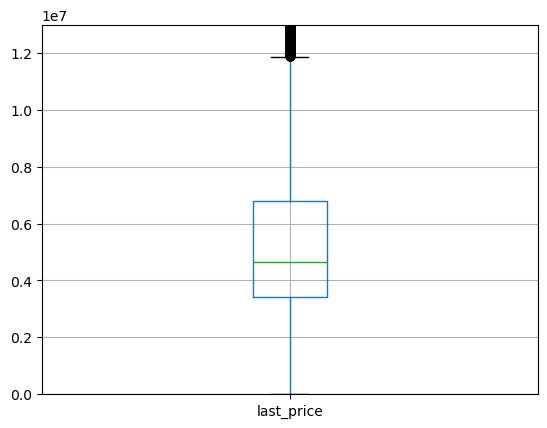

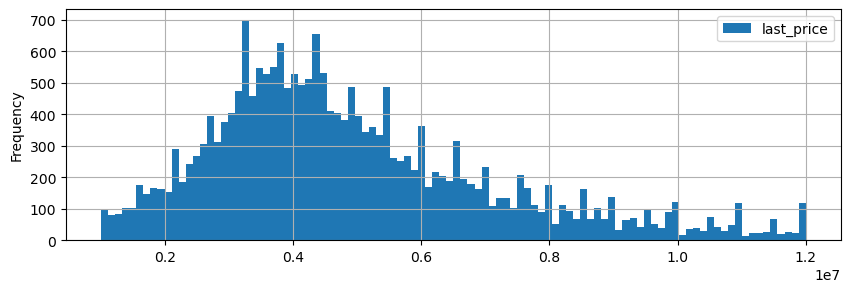

In [34]:
data.boxplot(column='last_price')
plt.ylim(0,13000000)
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (1000000,12000000))
display(len(data.query('1000000 <last_price > 12000000')) / len(data))

In [35]:
data=data.query('(last_price > 1000000) and (last_price < 12000000)')

0.011951070909687398

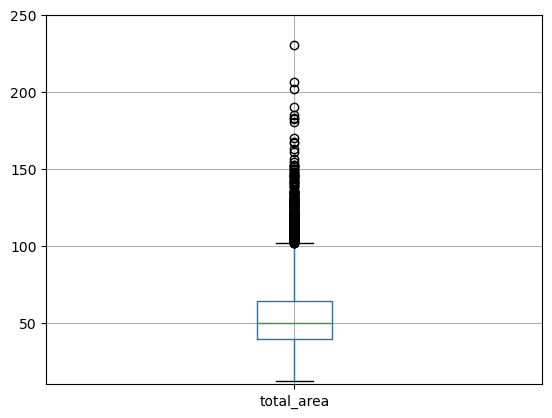

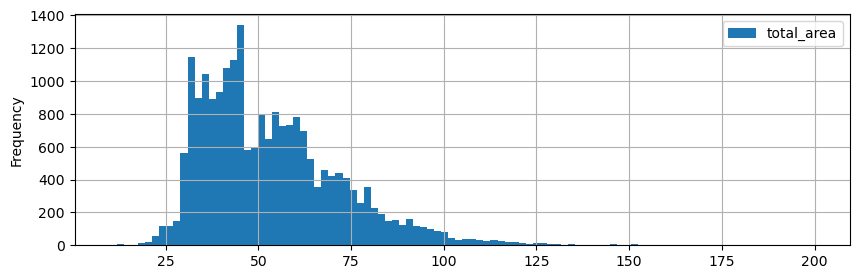

In [36]:
data.boxplot(column='total_area')
plt.ylim(10,250)
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (10,200))
display(len(data.query('20 <total_area > 110')) / len(data))

In [37]:
data=data.query('(total_area > 20) and (total_area < 110)')

0.00679948647235034

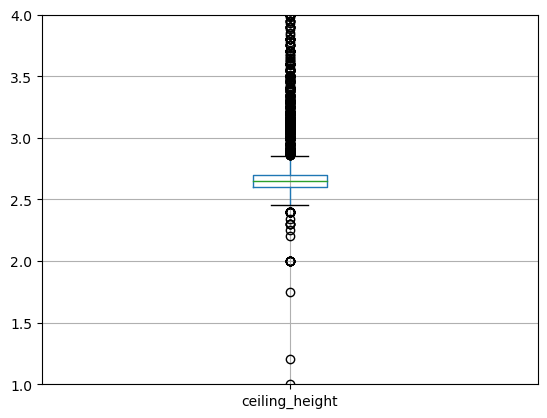

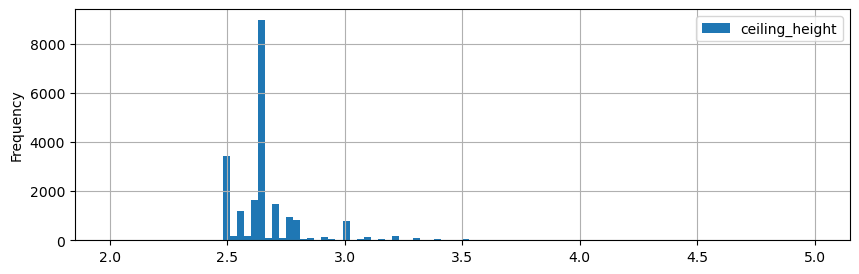

In [38]:
data.boxplot(column='ceiling_height')
plt.ylim(1,4)
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,3), range = (2,5))
display(len(data.query('2 <ceiling_height > 3.5')) / len(data))

In [39]:
data=data.query('(ceiling_height > 2) and (ceiling_height < 3.5)')

In [40]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,20810.000000,2.081000e+04,20810.000000,20810,20810.000000,20810.000000,20810.000000,20810.000000,20810.000000,20810.000000,20810.000000,15642.000000,15654.000000,20810.000000,6431.000000,20810.000000,7451.000000,18304.000000
mean,9.718068,4.830553e+06,52.490820,2017-11-17 11:45:07.352234752,1.906679,2.662143,10.932388,30.019035,5.957665,9.452605,0.601634,28983.970144,15103.817171,0.410860,491.289535,0.524411,533.301033,171.776060
min,0.000000,1.010000e+06,20.100000,2014-11-27 00:00:00,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.350000e+06,39.000000,2017-05-23 00:00:00,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,17944.000000,10783.250000,0.000000,292.000000,0.000000,318.000000,43.000000
50%,9.000000,4.400000e+06,49.000000,2017-12-16 00:00:00,2.000000,2.650000,9.000000,29.000000,4.000000,8.981327,0.000000,27357.500000,13704.500000,0.000000,456.000000,0.000000,522.000000,91.000000
75%,14.000000,5.950000e+06,63.000000,2018-08-28 00:00:00,3.000000,2.660000,16.000000,38.724614,8.000000,11.000000,1.000000,37883.750000,16735.000000,1.000000,615.000000,1.000000,741.000000,217.000000
max,50.000000,1.199900e+07,109.700000,2019-05-03 00:00:00,6.000000,3.490000,60.000000,89.100006,33.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.538904,2.140717e+06,17.292679,NaN,0.879297,0.146702,6.637645,12.305278,4.923070,3.694985,0.944354,13046.521179,8440.691502,0.696446,330.669031,0.821935,276.661396,210.202022


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20810 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20810 non-null  int64         
 1   last_price            20810 non-null  float64       
 2   total_area            20810 non-null  float64       
 3   first_day_exposition  20810 non-null  datetime64[ns]
 4   rooms                 20810 non-null  int64         
 5   ceiling_height        20810 non-null  float64       
 6   floors_total          20810 non-null  float64       
 7   living_area           20810 non-null  float64       
 8   floor                 20810 non-null  int64         
 9   is_apartment          2414 non-null   object        
 10  studio                20810 non-null  bool          
 11  open_plan             20810 non-null  bool          
 12  kitchen_area          20810 non-null  float64       
 13  balcony              

In [42]:
low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1300000.0
Нижняя граница last_price 11082930.92
Процент отброшенных значений =  1.95 %


# После предобработки данных было:
    1) удалено 2889 строк
    2) в столбцах balcony, ponds and parks 3000 пропушенные значения были заменены на ноль
    3) в столбце ceiling_height пропущенные значения были изменены на медиану, а также аномальные значения были удалены из списка
    4) в столбцах living_area and kitchen_area пропущенные значения были изменены на процент от общей площади квартиры
    5) удалены аномальные значения( порядка 8 %) соответствущие парметру столбца более 12 млн. руб 


### Посчитайте и добавьте в таблицу новые столбцы

Добавим цену одного квадратного метра

In [43]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data.head()

C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\984077048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_meter'] = data['last_price'] / data['total_area']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0.0,поселок городского типа янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456


Добавим день, месяц и год публикации

In [44]:
data['day_of_publication'] = data['first_day_exposition'].dt.day
data['month_of_publication'] = data['first_day_exposition'].dt.month_name()
data['year_of_publication'] = data['first_day_exposition'].dt.year
data.head()

C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\3206713298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_publication'] = data['first_day_exposition'].dt.day
C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\3206713298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_of_publication'] = data['first_day_exposition'].dt.month_name()
C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\3206713298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,August,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,June,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0.0,поселок городского типа янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,10,September,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,2,November,2017


Добавим:этаж квартиры( варианты — первый, последний, другой)

In [45]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_plan'] = data.apply(floor, axis=1)
display(data.head())

C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\1583061803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_plan'] = data.apply(floor, axis=1)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_plan
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,August,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,June,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0.0,поселок городского типа янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,10,September,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,2,November,2017,другой


In [46]:
data['city_centre_km'] = round(data['city_centers_nearest'] / 1000)
data.head()

C:\Users\lebed\AppData\Local\Temp\ipykernel_7404\843042348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city_centre_km'] = round(data['city_centers_nearest'] / 1000)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_plan,city_centre_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,December,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,August,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,June,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0.0,поселок городского типа янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,10,September,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,2,November,2017,другой,19.0


Проведите исследовательский анализ данных

'Общая площадь'

count    20810.000000
mean        52.490820
std         17.292679
min         20.100000
25%         39.000000
50%         49.000000
75%         63.000000
max        109.700000
Name: total_area, dtype: float64

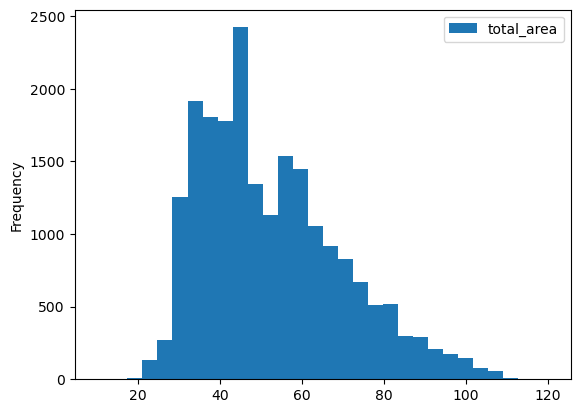

In [47]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, range = (10,120))
display('Общая площадь',
        data['total_area'].describe())

'Жилая площадь'

count    20810.000000
mean        30.019035
std         12.305278
min          2.000000
25%         18.300000
50%         29.000000
75%         38.724614
max         89.100006
Name: living_area, dtype: float64

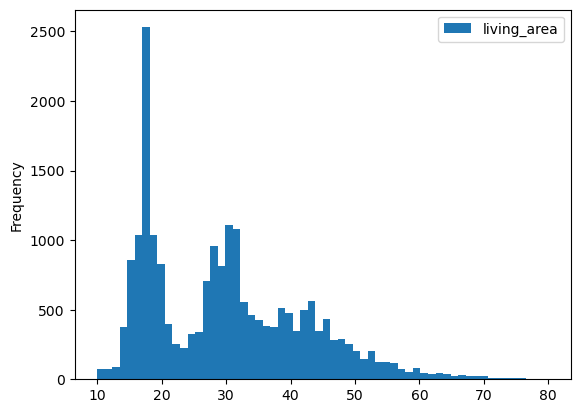

In [48]:
data.plot(y = 'living_area', kind = 'hist', bins = 60, range = (10,80))
display('Жилая площадь',
        data['living_area'].describe())

'Площадь кухни'

count    20810.000000
mean         9.452605
std          3.694985
min          1.300000
25%          7.000000
50%          8.981327
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

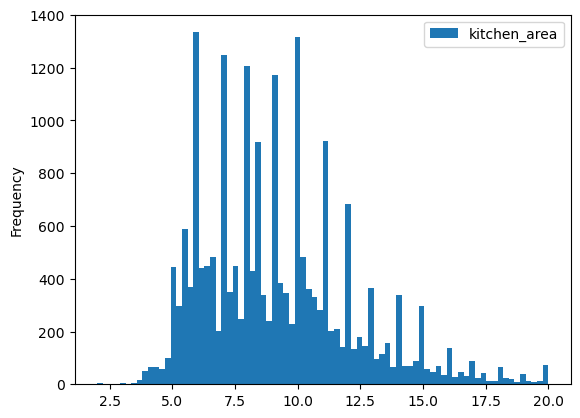

In [49]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 80, range = (2,20))
display('Площадь кухни',
        data['kitchen_area'].describe())

'Стоимость'

count    2.081000e+04
mean     4.830553e+06
std      2.140717e+06
min      1.010000e+06
25%      3.350000e+06
50%      4.400000e+06
75%      5.950000e+06
max      1.199900e+07
Name: last_price, dtype: float64

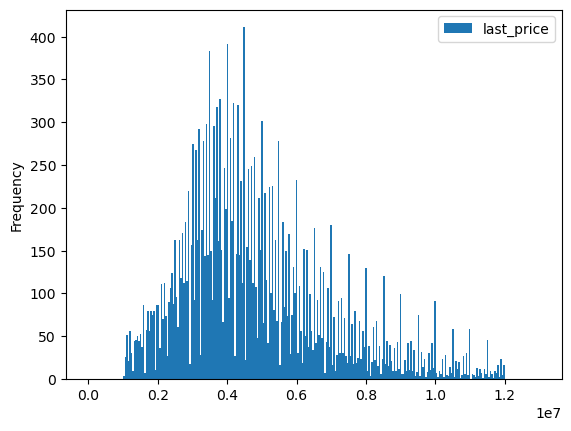

In [50]:
data.plot(y = 'last_price', kind = 'hist', bins = 300, range = (0,13000000))
display('Стоимость',
        data['last_price'].describe())

'Кол-во комнат'

count    20810.000000
mean         1.906679
std          0.879297
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

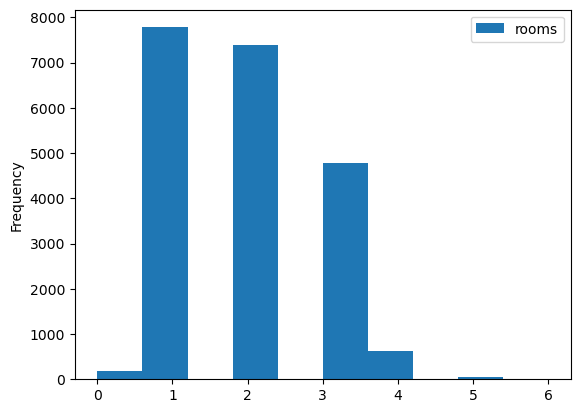

In [51]:
data.plot(y = 'rooms', kind = 'hist',range=(0,6), bins = 10)
display('Кол-во комнат',
        data['rooms'].describe())

'высота потолков'

count    20810.000000
mean         2.662143
std          0.146702
min          2.200000
25%          2.600000
50%          2.650000
75%          2.660000
max          3.490000
Name: ceiling_height, dtype: float64

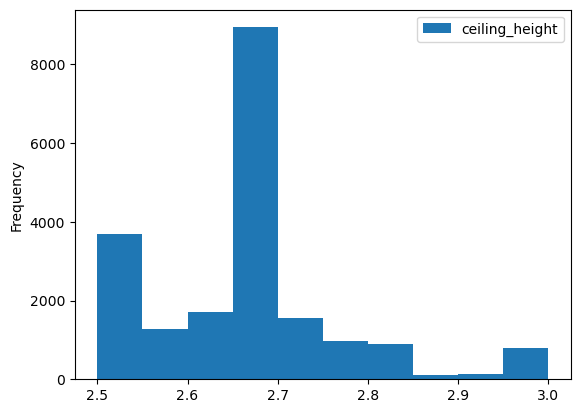

In [52]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range = (2.5,3))
display('высота потолков',
        data['ceiling_height'].describe())

'расстояние до центра'

count    15654.000000
mean     15103.817171
std       8440.691502
min        287.000000
25%      10783.250000
50%      13704.500000
75%      16735.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

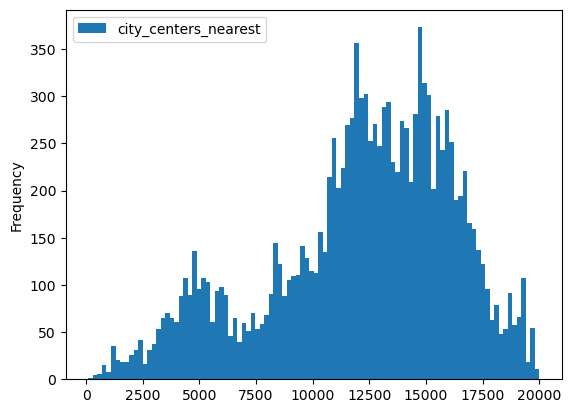

In [53]:
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, range = (100,20000))
display('расстояние до центра',
        data['city_centers_nearest'].describe())

'Этажи'

count    20810.000000
mean         5.957665
std          4.923070
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

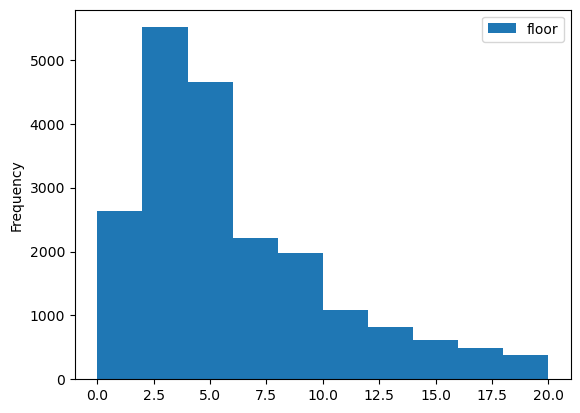

In [54]:
data.plot(y = 'floor', kind = 'hist', bins = 10, range = (0,20))
display('Этажи',
        data['floor'].describe())

Описание:
1) Основная масса представленных квартир находится в диапазоне от 40 до 100 кв. метров, малая часть квартир находится не в этой области с максимальным метражом в 900 квадратов
2) Жилая площадь находится в диапозоне 15 - 45 кв. метров, в прочем видна корреляция от общей площади и жилой, что логично. При этом стоимт отметить, что наблюдаются дополнительные всплески в районе 18 кв и 30 кв
3) Площадь кухни, популярные варианты от 5 до 12 квадратов.Основная плотность находится на уровне 8 квадратов.Кухнь более 20 квадратов единицы
4) Стоимость квартир варьируется от 1 до 760 млн. руб. , но основная масса квартир не превыщает 6 млн.руб.
5) Основными являются квартиры с 1,2 и 3 комнатами, меньше с 4, но стоит отметить,что есть кквартиры с 7 и более комнатами
6) высота потолков в среднем составляет 2,7 м. Также, есть данные в 100 м. это наверное какое-то здание
7) Есть ряд квартир,которые находятся недалеко от центра(2-5 км), но основная масса квартир находится в от 10 до 20 км
8) В среднем квартиры находятся от 3 до 6 этажа, малая часть квартир находится выше 13 этажа

Продажа квартиры.Сколько "висело" объясление

'висело'

count    18304.000000
mean       171.776060
std        210.202022
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

91.0

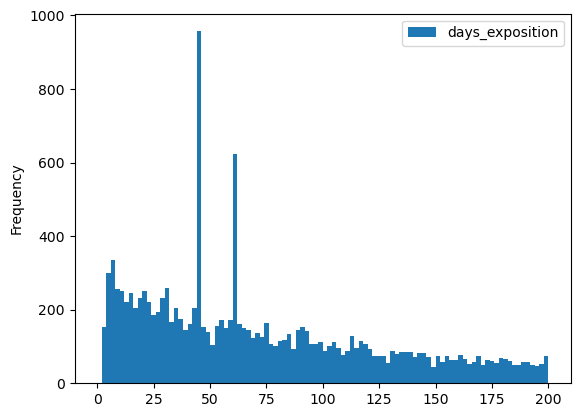

In [55]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, range=(0,200))
display('висело',
        data['days_exposition'].describe())
display(data['days_exposition'].median())

Медианное время продажи составляет 95 дней. Среднее время продажи составило 180 дней, тут стоит отметить влияние некоторых предложений, которое висит уже более 1500 дней(порядка 3 лет).
Основная масса квартир продается за 100 -120 дней. Есть большое число квартир проданных  до 30 дней.
Быстрой продажей, возможно, можно назвать продажи за первые 20 дней, а очень долгие от полугода и далее.

Факторы больше всего влияют на общую (полную) стоимость объекта


0.6936495995283183

<Axes: xlabel='total_area'>

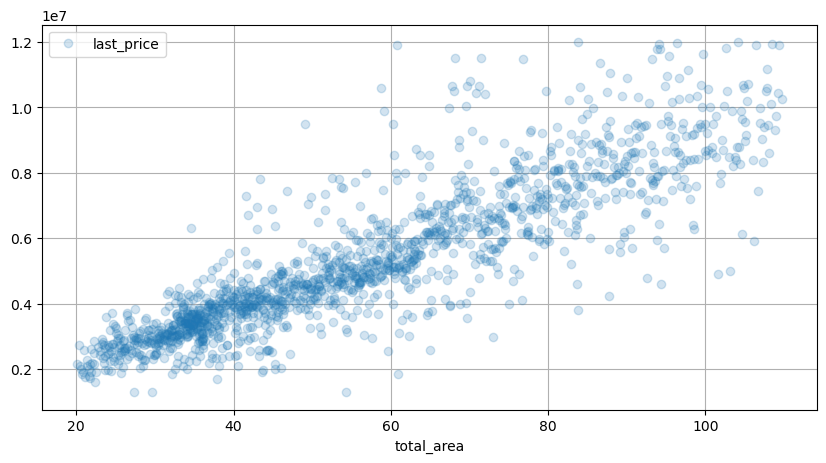

In [56]:
display(data['total_area'].corr(data['last_price']))
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o',alpha=0.2,figsize=(10,5))

0.5622554398410796

<Axes: xlabel='living_area'>

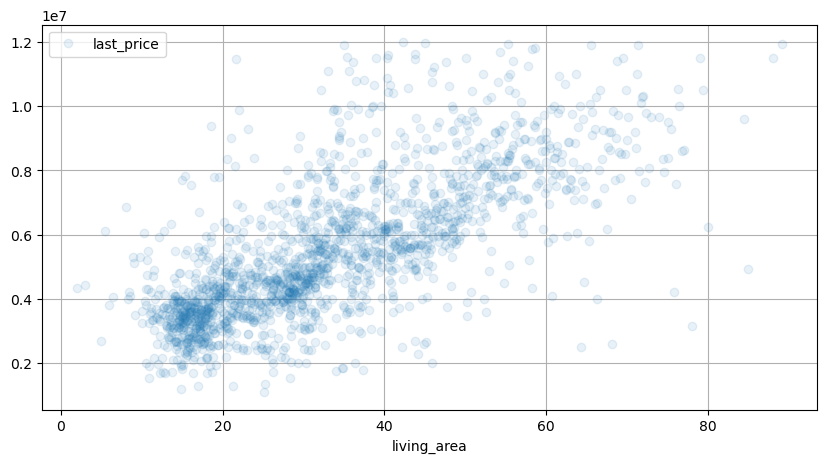

In [57]:
display(data['living_area'].corr(data['last_price']))
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o',alpha=0.1,figsize=(10,5))

0.4959730785327601

<Axes: xlabel='kitchen_area'>

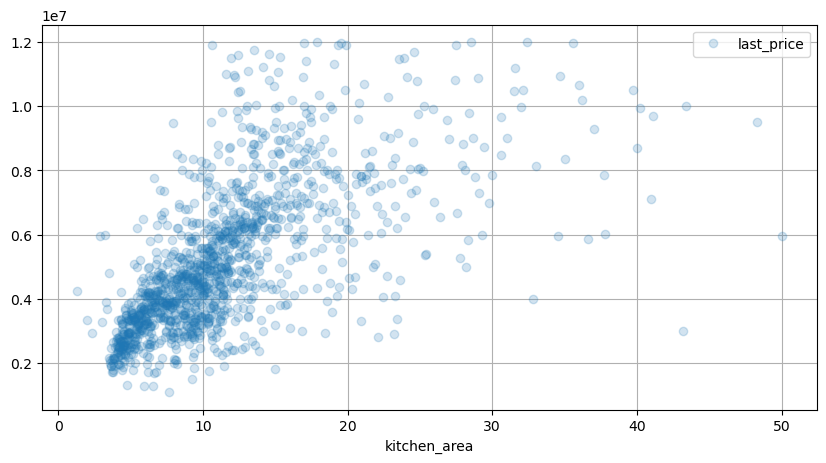

In [58]:
display(data['kitchen_area'].corr(data['last_price']))
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o',alpha=0.2,figsize=(10,5))

-0.24430716666255492

<Axes: xlabel='rooms'>

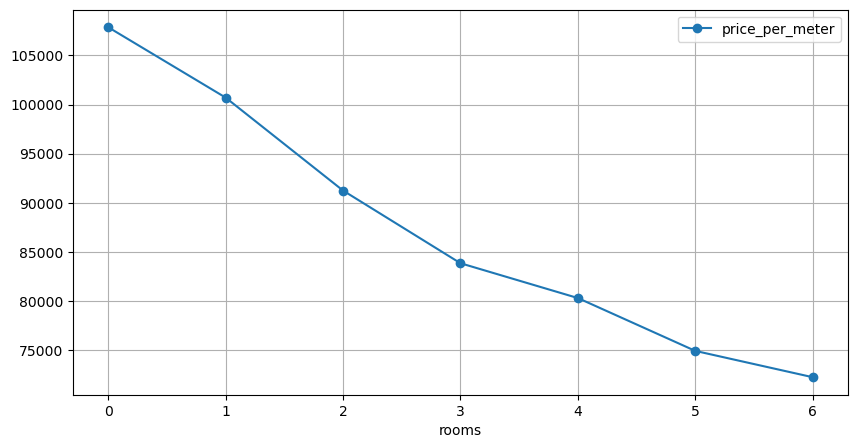

In [59]:
display(data['rooms'].corr(data['price_per_meter']))
data.pivot_table(index='rooms', values='price_per_meter').plot(grid=True, style='o-',figsize=(10,5))

<Axes: xlabel='floor_plan'>

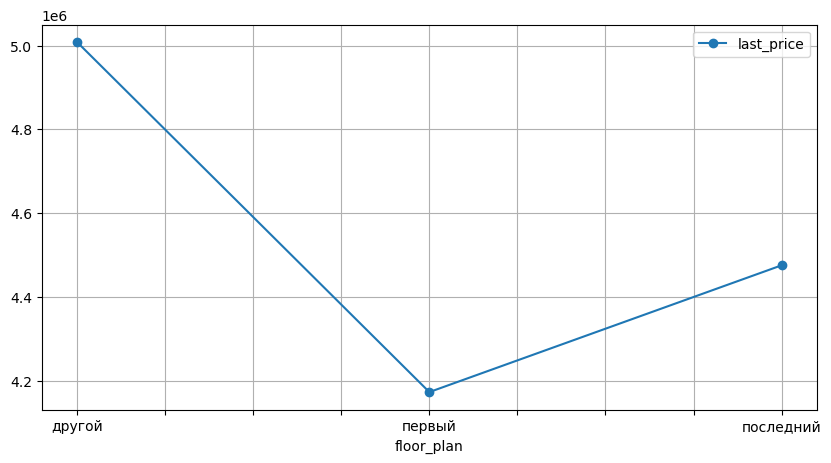

In [60]:
data.pivot_table(index='floor_plan', values='last_price').plot(grid=True, style='o-',figsize=(10,5))

-0.33951375940277173

<Axes: xlabel='city_centers_nearest'>

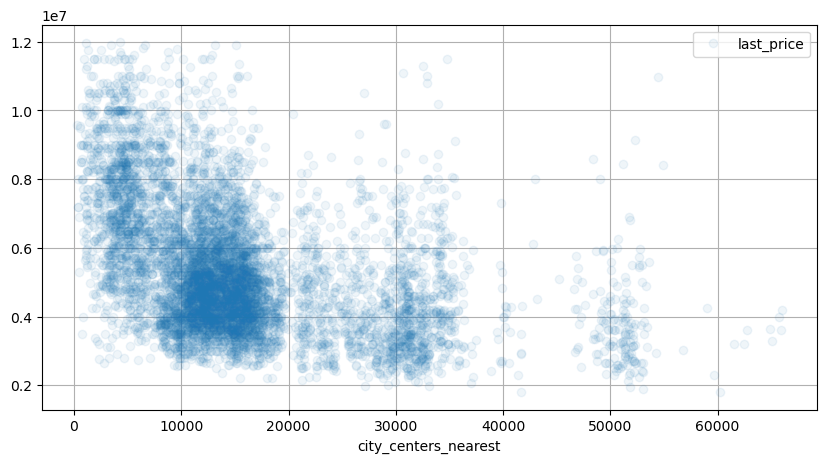

In [61]:
display(data['city_centers_nearest'].corr(data['last_price']))
data.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o',alpha=0.07,figsize=(10,5))

На основании данных видно, что  корреляция стоимости очень высокая от общей площади квартиры (~70%), меньшая корреляция от жилой площади (~60 %) и от площади кухни порядка ~50%. ПО количеству комнат, на мой взгляд, лучше сделать корреляцию к стоимости квадратного метра на которой видно, что стоимость квадрта падает до 5 комнта, а потом показывает небольшой рост. Этажность квартиры, также влияет на ее стоиомсть, так квартиры на первом этаже стоят дешевле всего. Стоимость квартир, в центре выше, хотя,как видно на графике, есть и очень дешевые варианты, при этом часть квартир до 30 км, находится в среднем ценовом диапазоне

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [62]:
top_10 = data['locality_name'].value_counts().head(10)
city_avg=data.query('locality_name in (@top_10.index)').pivot_table(values='price_per_meter', index='locality_name')
city_avg.sort_values('price_per_meter',ascending=False)


,price_per_meter
locality_name,
санкт-петербург,105762.585993
пушкин,100375.400044
деревня кудрово,92417.839878
поселок парголово,90417.201454
поселок мурино,85600.190654
поселок шушары,78574.916761
колпино,75221.876295
гатчина,68922.356963
всеволожск,67249.053998


<Axes: ylabel='locality_name'>

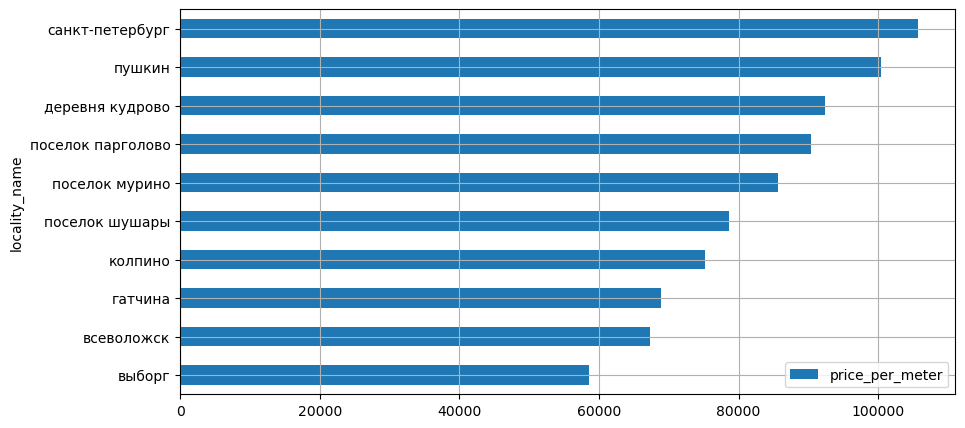

In [63]:
city_avg.sort_values('price_per_meter').plot(kind='barh', legend=True, grid=True, figsize=(10, 5))


Средняя стоимость квадратного метра в топ-10 городах: самая дорогая ставка за кв  в Санкт-Петербурге, самый дешевая - Выборг.

Зависимость стоимости объектов  от расстояния до центра города

<Axes: xlabel='city_centre_km'>

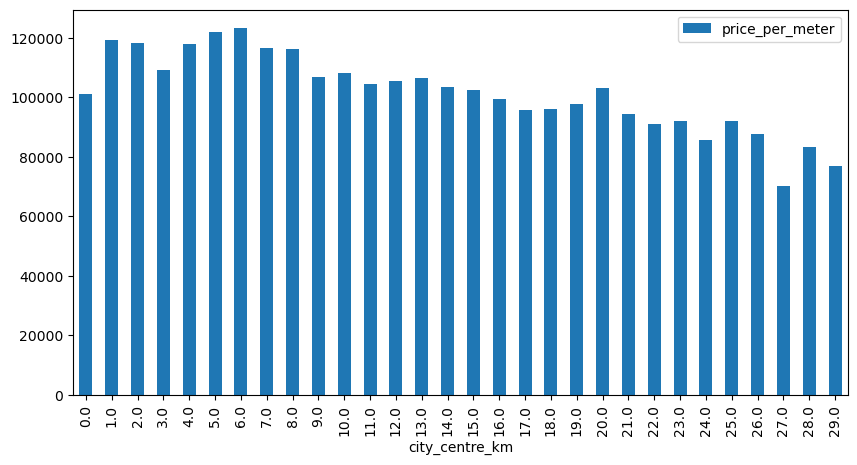

In [64]:
(
    data[data['locality_name'] == 'санкт-петербург']
    .pivot_table(
        index='city_centre_km',
        values='price_per_meter',
        aggfunc='mean')
    .plot(kind='bar',figsize=(10,5))
)

На графике видно, что максимальная стоимость квадратного метра находится на 1 км и 6 км,далее стоимость падает в соответсвии от удаления от центра до 9 км, далее приобретает более флэтовый рисунок,а на 20 км идет небольшой всплеск.

### Общий вывод

    Целью данной работы было определить рыночную стоимость объектов недвижимости в Санкт-Петербрге и ближаших городах. Основной  задачей было установить  основные параметры, а также их взаимосвязь, для дальнешей автоматизации процесса
    
    В рамках проведенных работ, было обработано порядка 23860 строк, в предоставленом варианте кол-во пропусков в столбцах доходило до 88 %, кол-во столбцов с пропусками 14 из 22,  порядка 2800 было оптимизировано в рамках аномальных значений или ввиду отсутствия данных и небольшого процента значений, которые могли повлиять на общие значения
    
    При обработке данных :
    - заменены дублицаты городов, например, были оптимизированы названия поселок и посЁлок
    - были приведены названия столбцов к змеиному формату
    - столбец first_day_exposition был изменен формат даты
    - были заменены пропуски в столбцах balcony, ponds and parks 3000 пропушенные значения были заменены на ноль
    - в столбце ceiling_height пропущенные значения были изменены на медиану, а также аномальные значения были удалены из списка
    - в столбцах living_area and kitchen_area пропущенные значения были изменены на процент от общей площади квартиры
   
    В данные были добавлены новые показатели :
        - цена одного квадратного метра
        - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
        - месяц публикации объявления
        - год публикации объявления
        - тип этажа квартиры (значения — «первый», «последний», «другой»)
        - расстояние в км до центра города
        
    Были изучены основные параметры квартир:
    - Основная часть представленных квартир находится в диапазоне от 40 до 100 кв. м.
    - Жилая площадь находится в диапозоне 15 - 45 кв. м.
    - Площадь кухни, популярные варианты от 5 до 12 квадратов.Основная плотность находится на уровне 8 квадратов.
    - Стоимость квартир основной части квартир не превыщает 6 млн.руб. 
    - Основными являются квартиры с 1,2 и 3 комнатами, меньше с 4
    - Высота потолков в среднем составляет 2,7 м. 
    - Основная часть квартир находится от 10 до 20 км до центра 
    - В среднем квартиры находятся от 3 до 6 этажа
    
    Далее был проведен анализ продажи квартиры:
    
      Основная часть квартир продается за 100 -120 дней. Медианное время продажи составляет 91 дней. 
      Среднее время продажи составило 171 дней
    
    Срез данных по top-10 городам показал, что самая высокая средняя стоимость квадратного метра находится в Санкт-Петербурге и составила 105 762 рублей , самый дешевая - Выборг (58 610 рублей).
    
    И в конце был сделан срез по влияния цены на удаленость от центра города, который показал, что максимальная цена кв. метра в 12тыс. рублей находится на отметке в 1 км и 6 км 
    
    